## Observations and Insights 

In [62]:
#
#Author T. Brafdord 
#June 2021

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Checking the number of mice.

#length to get unique number of mice
unique_mouse_count_df = len(combined_mouse_df["Mouse ID"].unique())

#length to get total number of entries
mouse_count_df = len(combined_mouse_df["Mouse ID"])

#create Dataframe using dictionary of list
total_mouse_df = pd.DataFrame({"Total Number of Mouse ID": [mouse_count_df], "Unique Number of Mouse ID": [unique_mouse_count_df]})

#display
total_mouse_df

,Total Number of Mouse ID,Unique Number of Mouse ID
0,1893,249


In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#retrieve entries that are duplicated in both the Mouse ID and Timepoints 
mouse_id_timepoint_df = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#display
mouse_id_timepoint_df


array(['g989'], dtype=object)

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 

#identify duplicate mouse id rows 908 & 909 
repeated_id = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"]
repeated_id.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

##retrieve Mouse ID duplicates
duplicate_mouse_df = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(mouse_id_timepoint_df)==False]
clean_df = duplicate_mouse_df.drop_duplicates("Mouse ID")

#display
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [67]:
# Checking the number of mice in the clean DataFrame.

#length to get total number of entries in clean data
new_mouse_count_df = len(duplicate_mouse_df["Mouse ID"].unique())

#create Dataframe
clean_mouse_count_df = pd.DataFrame({"Clean Data Mice Count": [new_mouse_count_df]})

#set new index to Clean Data Mice Count
clean_mouse_count_df = clean_mouse_count_df.set_index("Clean Data Mice Count")

#display
clean_mouse_count_df


""
Clean Data Mice Count
248


## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group data by Drug 
drug_df = combined_mouse_df.groupby("Drug Regimen")

#calculate mean, median, variance, standard deviation, and SEM of the tumor volume
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_variance = drug_df["Tumor Volume (mm3)"].var()
drug_std = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

#create Dataframe
stat_table_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance":drug_variance, "standard deviation": drug_std, "Standard Error of the Mean":drug_sem})

#display
stat_table_df


,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = stat_table_df.agg(["Capomulin", "Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])

#display
aggregation_df


,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [70]:
#count drug regimen
drug_count = combined_mouse_df["Drug Regimen"].value_counts()

#create Dataframe to get drug rerimen counts
drug_total_df = pd.DataFrame({"Drug Regimen Count": drug_count})

#display
drug_total_df


,Drug Regimen Count
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


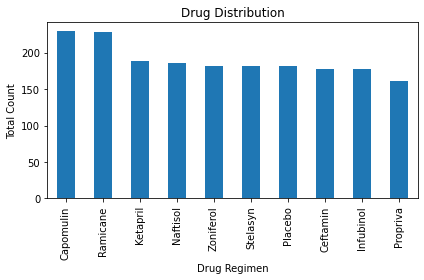

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#plot chart with title and labels
drug_chart = drug_count.plot(kind = "bar", width = 0.5, title = "Drug Distribution")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Total Count")
plt.tight_layout()



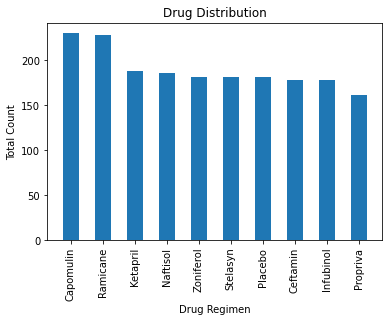

<Figure size 432x288 with 0 Axes>

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x_axis
x_axis = np.arange(len(drug_count))

#plot chart with title and labels
plt.bar(x_axis, drug_count, width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.title("Drug Distribution")

# Label the tick marks 
tick_locations = [total for total in x_axis]
plt.xticks(tick_locations, drug_count.index.values)
plt.xticks(rotation = "vertical")

# Save the figure
plt.savefig("output/drug_distribution_bar.jpg")

# Display
plt.show()
plt.tight_layout()

In [73]:
#count by sex and calculate percentage 
gender_both = combined_mouse_df.loc[:"Sex"]
gender_grand_total = gender_both.count()["Sex"]
gender_count = combined_mouse_df["Sex"].value_counts()
gender_percent = gender_count / gender_grand_total * 100

#create Dataframe to get gender count and percentage
gender_total_df = pd.DataFrame({"Drug Regimen Count": gender_count, "Drug Regimen Percentage": gender_percent})
gender_total_df["Drug Regimen Percentage"] = gender_total_df["Drug Regimen Percentage"].map("{0:.2f}%".format)

gender_total_df

,Drug Regimen Count,Drug Regimen Percentage
Male,958,50.61%
Female,935,49.39%


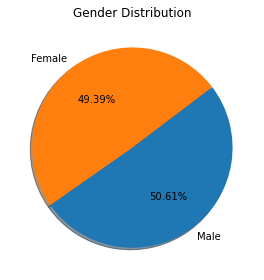

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Plot chart
pie_plot = gender_count.plot(kind = "pie", autopct="%1.2f%%", shadow = True, startangle=215, title="Gender Distribution")

#remove "sex" labeling by displaying nothing 
pie_plot.set_ylabel("")
plt.tight_layout()

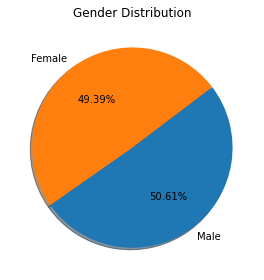

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot chart
plt.pie(gender_count, labels=gender_count.index.values, autopct="%1.2f%%", startangle=215, shadow = True)
plt.title("Gender Distribution")

# Save the figure
plt.savefig("output/gender_pie.jpg")

#display
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




In [77]:
#max timepoint for each mouse
max_timepoint_df = pd.DataFrame(combined_mouse_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).rename(columns={'Timepoint': 'Max Timepoint'})

#display
max_timepoint_df.head()

,Max Timepoint
Mouse ID,
t573,0
u153,0
d133,0
n482,0
o848,0


In [78]:
#make a list of drugs
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#retieve data for the four desired drugs
select_drugs = combined_mouse_df[combined_mouse_df["Drug Regimen"].isin(drug_list) == True]

#Display first 15 rows
select_drugs.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [79]:
#merge max timepoint onto drug list
merged_max_drug_df = pd.merge(select_drugs, max_timepoint_df, on='Mouse ID')
merged_max_drug_df.to_csv("output/merged_max_drug_df.csv")
merged_max_drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [80]:
#only return data is drug list where timepoint equals max timepoint
filtered_merged_max_drug_df = merged_max_drug_df.loc[merged_max_drug_df["Timepoint"] == merged_max_drug_df["Max Timepoint"], :]
filtered_merged_max_drug_df.to_csv("output/filtered_merged_max_drug_df.csv")
filtered_merged_max_drug_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
59,s508,Ramicane,Male,1,17,45,30.276232,0,45
64,f966,Capomulin,Male,16,17,20,30.485985,0,20
74,m546,Ramicane,Male,18,16,45,30.564625,1,45
84,z578,Ramicane,Male,11,16,45,30.638696,0,45
94,j913,Ramicane,Female,4,17,45,31.560470,1,45


In [81]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [83]:
#find a mouse

#find mouse x401 by. loc on Mouse ID column
single_mouse = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "x401"]

#display for reference
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


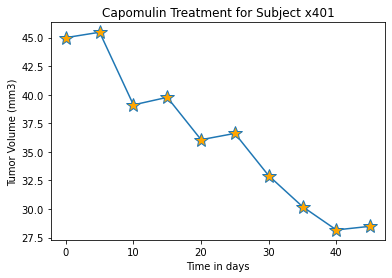

<Figure size 432x288 with 0 Axes>

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Plot chart and add labels and title 
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker = "*", markerfacecolor = "orange", markersize = 14,)
plt.xlabel("Time in days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Subject x401")

# Save the figure
plt.savefig("output/x401_line_chart.jpg")

# Display plot
plt.show()
plt.tight_layout()

In [85]:

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_mouse_df.loc[combined_mouse_df['Drug Regimen'] == 'Capomulin']

#display for reference
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [86]:
#Average tumor volume by Capomulin regimen

# Find average tumor volume for each mouse
average_tumor_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})

#display
average_tumor_df.head()

,Average Tumor Volume
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344


In [87]:
# Merge average tumor volume onto capomulin_df
average_tumor_df = pd.merge(capomulin_df, average_tumor_df, on="Mouse ID")

#display
average_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average Tumor Volume
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


In [88]:
#Get weight and average tumor volume and drop duplicates from merged dataframe
average_volume_df = average_tumor_df[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()

average_volume_df.head()

,Weight (g),Average Tumor Volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


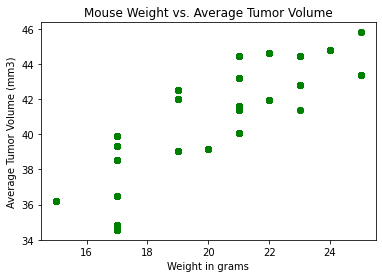

<Figure size 432x288 with 0 Axes>

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#define axis
xaxis = average_tumor_df["Weight (g)"]
yaxis = average_tumor_df["Average Tumor Volume"]

#plot chart and add labels and title to plot 
plt.scatter(xaxis, yaxis, facecolor= "green")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
xaxis = average_volume_df["Weight (g)"]
yaxis = average_volume_df["Average Tumor Volume"]

# Save the figure
plt.savefig("output/weight_vs_tumor.jpg")

# Display plot
plt.show()
plt.tight_layout()

## Correlation and Regression

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#compute the Pearson correlation coefficient between "Weight" and "Average Tumor Volume"
correlation = st.pearsonr(xaxis,yaxis)

#Print
print(f"The correlation between both factors is {correlation[0]}")

The correlation between both factors is 0.8419363424694718


The r-squared is: 0.841936342469472
The equation of the regression line is: y = 0.95x + 21.55


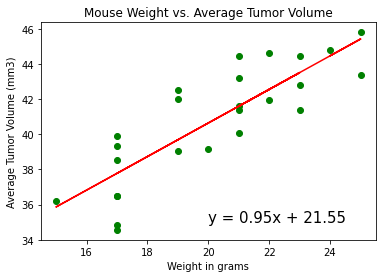

<Figure size 432x288 with 0 Axes>

In [91]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(xaxis,yaxis, facecolor= "green")
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15)
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("output/weight_vs_tumor_regression.jpg")

plt.show()
plt.tight_layout()